In [7]:
import pandas as pd
import numpy as np

from sklearn import model_selection
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer 
import PIL as pillow
import wordcloud
from operator import itemgetter

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


In [8]:
df =pd.read_csv('../part-03/tory_labour_snp.csv')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.party, stratify = df.party, random_state = 1)

In [4]:
tfidf = TfidfVectorizer(stop_words= 'english', ngram_range= (1,2), max_features = 1000)

In [5]:
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

In [24]:
X_train_tf.shape

(95426, 1000)

In [25]:
X_train_tf

<95426x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 3209690 stored elements in Compressed Sparse Row format>

In [31]:
allmodels = []
allparams = []
alltestscores = []
alltrainscores = []

In [26]:
model = LogisticRegression(solver='saga', multi_class = 'ovr', max_iter = 10000)
params = {'C': np.logspace(-4, 4, 5),
          'penalty': ['l1', 'l2']
         }
gs = GridSearchCV(estimator = model,
                 param_grid = params, 
                 cv = 5, 
                verbose = 10,
                n_jobs = -1
                 )
if __name__ == '__main__':
    gs.fit(X_train_tf, y_train)


best_params = gs.best_params_
best_score = gs.best_score_
testscore =  gs.score(X_test_tf, y_test)
allmodels.append(gs.best_estimator_)
allparams.append(best_params)
alltestscores.append(testscore)
alltrainscores.append(best_score)

print('best score ', best_score)
print('test score ', testscore)
print('best params ', best_params)

predictions = gs.predict(X_test_tf)

print()
print(classification_report(y_test, predictions))

pd.DataFrame(confusion_matrix(y_test, predictions,
                              labels=y_test.unique()),
             columns=y_test.unique(),
             index=y_test.unique())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  3.9min remaining:   51.4s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:  4.9min remaining:   18.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.6min finished


NameError: name 'allmodels' is not defined

In [32]:
best_params = gs.best_params_
best_score = gs.best_score_
testscore =  gs.score(X_test_tf, y_test)
allmodels.append(gs.best_estimator_)
allparams.append(best_params)
alltestscores.append(testscore)
alltrainscores.append(best_score)

print('best score ', best_score)
print('test score ', testscore)
print('best params ', best_params)

predictions = gs.predict(X_test_tf)

print()
print(classification_report(y_test, predictions))

pd.DataFrame(confusion_matrix(y_test, predictions,
                              labels=y_test.unique()),
             columns=y_test.unique(),
             index=y_test.unique())

best score  0.7497536709796463
test score  0.7491276053946996
best params  {'C': 1.0, 'penalty': 'l1'}

                         precision    recall  f1-score   support

           Conservative       0.79      0.90      0.84     20643
                 Labour       0.64      0.53      0.58      8798
Scottish National Party       0.68      0.22      0.33      2368

               accuracy                           0.75     31809
              macro avg       0.70      0.55      0.58     31809
           weighted avg       0.74      0.75      0.73     31809



,Labour,Conservative,Scottish National Party
Labour,4687,4019,92
Conservative,1866,18621,156
Scottish National Party,795,1052,521


In [35]:
allparams

[{'C': 1.0, 'penalty': 'l1'}]

In [37]:
model = ExtraTreesClassifier()
params = { 'n_estimators': [16, 32] }
gs = GridSearchCV(estimator = model,
                 param_grid = params, 
                 cv = 3,
                  n_jobs = -1, 
                  verbose = 10
                 )
if __name__ == '__main__':
    gs.fit(X_train_tf, y_train)

best_params = gs.best_params_
best_score = gs.best_score_
testscore =  gs.score(X_test_tf, y_test)
allmodels.append(gs.best_estimator_)
allparams.append(best_params)
alltestscores.append(testscore)
alltrainscores.append(best_score)

print('best score ', best_score)
print('test score ', testscore)
print('best params ', best_params)

predictions = gs.predict(X_test_tf)

print()
print(classification_report(y_test, predictions))

pd.DataFrame(confusion_matrix(y_test, predictions,
                              labels=y_test.unique()),
             columns=y_test.unique(),
             index=y_test.unique())

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:  1.4min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:  1.4min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:  2.4min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  2.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  2.4min finished


best score  0.7365497681036284
test score  0.7432487660724952
best params  {'n_estimators': 32}

                         precision    recall  f1-score   support

           Conservative       0.76      0.93      0.84     20643
                 Labour       0.67      0.45      0.54      8798
Scottish National Party       0.80      0.18      0.29      2368

               accuracy                           0.74     31809
              macro avg       0.74      0.52      0.56     31809
           weighted avg       0.74      0.74      0.71     31809



,Labour,Conservative,Scottish National Party
Labour,3941,4807,50
Conservative,1305,19281,57
Scottish National Party,599,1349,420


In [39]:
model = RandomForestClassifier()
params = { 'n_estimators': [16, 32] ,
          'criterion': ['gini', 'entropy'], 
          'n_estimators': [8, 16]}
gs = GridSearchCV(estimator = model,
                 param_grid = params, 
                 cv = 3,
                  n_jobs = -1, 
                  verbose = 10
                 )
if __name__ == '__main__':
    gs.fit(X_train_tf, y_train)


best_params = gs.best_params_
best_score = gs.best_score_
testscore =  gs.score(X_test_tf, y_test)
allmodels.append(gs.best_estimator_)
allparams.append(best_params)
alltestscores.append(testscore)
alltrainscores.append(best_score)

print('best score ', best_score)
print('test score ', testscore)
print('best params ', best_params)

predictions = gs.predict(X_test_tf)

print()
print(classification_report(y_test, predictions))

pd.DataFrame(confusion_matrix(y_test, predictions,
                              labels=y_test.unique()),
             columns=y_test.unique(),
             index=y_test.unique())

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:   33.1s remaining:  1.7min
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:   36.3s remaining:   50.8s
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:  1.1min remaining:   47.3s
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:  1.1min remaining:   22.1s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.5min finished


best score  0.7349778605640993
test score  0.7415196956836115
best params  {'criterion': 'entropy', 'n_estimators': 16}

                         precision    recall  f1-score   support

           Conservative       0.77      0.91      0.83     20643
                 Labour       0.65      0.47      0.54      8798
Scottish National Party       0.74      0.25      0.37      2368

               accuracy                           0.74     31809
              macro avg       0.72      0.54      0.58     31809
           weighted avg       0.73      0.74      0.72     31809



,Labour,Conservative,Scottish National Party
Labour,4118,4604,76
Conservative,1627,18883,133
Scottish National Party,589,1193,586


In [40]:
model = AdaBoostClassifier()
params = { 'n_estimators': [16, 32] }
gs = GridSearchCV(estimator = model,
                 param_grid = params, 
                 cv = 3,
                  n_jobs = -1, 
                  verbose = 10
                 )
if __name__ == '__main__':
    gs.fit(X_train_tf, y_train)


best_params = gs.best_params_
best_score = gs.best_score_
testscore =  gs.score(X_test_tf, y_test)
allmodels.append(gs.best_estimator_)
allparams.append(best_params)
alltestscores.append(testscore)
alltrainscores.append(best_score)

print('best score ', best_score)
print('test score ', testscore)
print('best params ', best_params)

predictions = gs.predict(X_test_tf)

print()
print(classification_report(y_test, predictions))

pd.DataFrame(confusion_matrix(y_test, predictions,
                              labels=y_test.unique()),
             columns=y_test.unique(),
             index=y_test.unique())

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:    9.9s remaining:   19.8s
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   10.1s remaining:   10.1s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:   16.7s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   16.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   16.9s finished


best score  0.7083288992366388
test score  0.708007167782703
best params  {'n_estimators': 32}

                         precision    recall  f1-score   support

           Conservative       0.75      0.87      0.81     20643
                 Labour       0.57      0.44      0.50      8798
Scottish National Party       0.59      0.27      0.37      2368

               accuracy                           0.71     31809
              macro avg       0.64      0.53      0.56     31809
           weighted avg       0.69      0.71      0.69     31809



,Labour,Conservative,Scottish National Party
Labour,3900,4788,110
Conservative,2331,17984,328
Scottish National Party,574,1157,637


In [41]:
model = GradientBoostingClassifier()
params = { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] }
gs = GridSearchCV(estimator = model,
                 param_grid = params, 
                 cv = 3,
                  n_jobs = -1, 
                  verbose = 10
                 )
if __name__ == '__main__':
    gs.fit(X_train_tf, y_train)


best_params = gs.best_params_
best_score = gs.best_score_
testscore =  gs.score(X_test_tf, y_test)
allmodels.append(gs.best_estimator_)
allparams.append(best_params)
alltestscores.append(testscore)
alltrainscores.append(best_score)

print('best score ', best_score)
print('test score ', testscore)
print('best params ', best_params)

predictions = gs.predict(X_test_tf)

print()
print(classification_report(y_test, predictions))

pd.DataFrame(confusion_matrix(y_test, predictions,
                              labels=y_test.unique()),
             columns=y_test.unique(),
             index=y_test.unique())

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:  1.2min remaining:  3.5min
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:  1.2min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:  2.2min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:  2.2min remaining:   44.6s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  2.9min finished


best score  0.7388866540171795
test score  0.7387217454179634
best params  {'learning_rate': 1.0, 'n_estimators': 32}

                         precision    recall  f1-score   support

           Conservative       0.78      0.88      0.83     20643
                 Labour       0.62      0.51      0.56      8798
Scottish National Party       0.61      0.32      0.42      2368

               accuracy                           0.74     31809
              macro avg       0.67      0.57      0.60     31809
           weighted avg       0.72      0.74      0.72     31809



,Labour,Conservative,Scottish National Party
Labour,4508,4109,181
Conservative,2098,18241,304
Scottish National Party,662,957,749


In [42]:
model = MultinomialNB()
params = {'alpha':np.linspace(0.1,3,20)}
gs = GridSearchCV(estimator = model,
                 param_grid = params, 
                 cv = 3,
                  n_jobs = -1, 
                  verbose = 10
                 )
if __name__ == '__main__':
    gs.fit(X_train_tf, y_train)


best_params = gs.best_params_
best_score = gs.best_score_
testscore =  gs.score(X_test_tf, y_test)
allmodels.append(gs.best_estimator_)
allparams.append(best_params)
alltestscores.append(testscore)
alltrainscores.append(best_score)

print('best score ', best_score)
print('test score ', testscore)
print('best params ', best_params)

predictions = gs.predict(X_test_tf)

print()
print(classification_report(y_test, predictions))

pd.DataFrame(confusion_matrix(y_test, predictions,
                              labels=y_test.unique()),
             columns=y_test.unique(),
             index=y_test.unique())

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  52 out of  60 | elapsed:    4.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.9s finished


best score  0.7016431468920833
test score  0.7026313307554466
best params  {'alpha': 0.1}

                         precision    recall  f1-score   support

           Conservative       0.70      0.98      0.82     20643
                 Labour       0.74      0.23      0.35      8798
Scottish National Party       0.74      0.06      0.10      2368

               accuracy                           0.70     31809
              macro avg       0.73      0.42      0.42     31809
           weighted avg       0.71      0.70      0.63     31809



,Labour,Conservative,Scottish National Party
Labour,1997,6791,10
Conservative,386,20221,36
Scottish National Party,331,1905,132


In [43]:
model = BernoulliNB()
params = {'alpha':np.linspace(0.1,1,10)}
gs = GridSearchCV(estimator = model,
                 param_grid = params, 
                 cv = 3,
                  n_jobs = -1, 
                  verbose = 10
                 )
if __name__ == '__main__':
    gs.fit(X_train_tf, y_train)


best_params = gs.best_params_
best_score = gs.best_score_
testscore =  gs.score(X_test_tf, y_test)
allmodels.append(gs.best_estimator_)
allparams.append(best_params)
alltestscores.append(testscore)
alltrainscores.append(best_score)

print('best score ', best_score)
print('test score ', testscore)
print('best params ', best_params)

predictions = gs.predict(X_test_tf)

print()
print(classification_report(y_test, predictions))

pd.DataFrame(confusion_matrix(y_test, predictions,
                              labels=y_test.unique()),
             columns=y_test.unique(),
             index=y_test.unique())

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:    2.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    2.6s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.1s finished


best score  0.6617378893094069
test score  0.6599075733283033
best params  {'alpha': 0.1}

                         precision    recall  f1-score   support

           Conservative       0.73      0.83      0.78     20643
                 Labour       0.53      0.35      0.42      8798
Scottish National Party       0.31      0.33      0.32      2368

               accuracy                           0.66     31809
              macro avg       0.52      0.50      0.51     31809
           weighted avg       0.64      0.66      0.64     31809



,Labour,Conservative,Scottish National Party
Labour,3076,5102,620
Conservative,2380,17125,1138
Scottish National Party,352,1226,790


In [50]:
maxfeatures1000 = pd.DataFrame(list(zip(allmodels, allparams, alltrainscores, alltestscores)), columns = ['model', 'parameters', 
                                                                                        'cv training score', 'test score'])

In [51]:
maxfeatures1000

,model,parameters,cv training score,test score
0,"LogisticRegression(max_iter=10000, multi_class...","{'C': 1.0, 'penalty': 'l1'}",0.749754,0.749128
1,"(ExtraTreeClassifier(random_state=702707310), ...",{'n_estimators': 32},0.736550,0.743249
2,"(DecisionTreeClassifier(criterion='entropy', m...","{'criterion': 'entropy', 'n_estimators': 16}",0.734978,0.741520
3,"(DecisionTreeClassifier(max_depth=1, random_st...",{'n_estimators': 32},0.708329,0.708007
4,([DecisionTreeRegressor(criterion='friedman_ms...,"{'learning_rate': 1.0, 'n_estimators': 32}",0.738887,0.738722
5,MultinomialNB(alpha=0.1),{'alpha': 0.1},0.701643,0.702631
6,BernoulliNB(alpha=0.1),{'alpha': 0.1},0.661738,0.659908


Lets try to increase the max features and see if we can improve upon the scores


In [137]:
tfidf = TfidfVectorizer(stop_words= 'english', ngram_range= (1,2), max_features = 2000)

In [138]:
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

In [62]:
allmodels = []
allparams = []
alltestscores = []
alltrainscores = []

In [63]:
model = LogisticRegression(solver='saga', multi_class = 'ovr', max_iter = 10000)
params = {'C': np.logspace(-4, 4, 5),
          'penalty': ['l1', 'l2']
         }
gs = GridSearchCV(estimator = model,
                 param_grid = params, 
                 cv = 3, 
                verbose = 10,
                n_jobs = -1
                 )
if __name__ == '__main__':
    gs.fit(X_train_tf, y_train)


best_params = gs.best_params_
best_score = gs.best_score_
testscore =  gs.score(X_test_tf, y_test)
allmodels.append(gs.best_estimator_)
allparams.append(best_params)
alltestscores.append(testscore)
alltrainscores.append(best_score)

print('best score ', best_score)
print('test score ', testscore)
print('best params ', best_params)

predictions = gs.predict(X_test_tf)

print()
print(classification_report(y_test, predictions))

pd.DataFrame(confusion_matrix(y_test, predictions,
                              labels=y_test.unique()),
             columns=y_test.unique(),
             index=y_test.unique())

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  1.6min remaining:   54.2s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  8.4min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 22.9min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 68.5min finished


best score  0.7614276410424781
test score  0.7619227262724386
best params  {'C': 1.0, 'penalty': 'l1'}

                         precision    recall  f1-score   support

           Conservative       0.80      0.91      0.85     20643
                 Labour       0.66      0.56      0.61      8798
Scottish National Party       0.69      0.25      0.37      2368

               accuracy                           0.76     31809
              macro avg       0.71      0.57      0.61     31809
           weighted avg       0.75      0.76      0.75     31809



,Labour,Conservative,Scottish National Party
Labour,4945,3749,104
Conservative,1779,18698,166
Scottish National Party,813,962,593


In [64]:
model = ExtraTreesClassifier()
params = { 'n_estimators': [16, 32, 200, 1000] }
gs = GridSearchCV(estimator = model,
                 param_grid = params, 
                 cv = 3,
                  n_jobs = -1, 
                  verbose = 10
                 )
if __name__ == '__main__':
    gs.fit(X_train_tf, y_train)

best_params = gs.best_params_
best_score = gs.best_score_
testscore =  gs.score(X_test_tf, y_test)
allmodels.append(gs.best_estimator_)
allparams.append(best_params)
alltestscores.append(testscore)
alltrainscores.append(best_score)

print('best score ', best_score)
print('test score ', testscore)
print('best params ', best_params)

predictions = gs.predict(X_test_tf)

print()
print(classification_report(y_test, predictions))

pd.DataFrame(confusion_matrix(y_test, predictions,
                              labels=y_test.unique()),
             columns=y_test.unique(),
             index=y_test.unique())

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:  1.8min remaining:  5.4min
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:  3.6min remaining:  5.0min
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed: 18.2min remaining: 13.0min
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed: 19.2min remaining:  6.4min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 68.5min finished


best score  0.7507387566172707
test score  0.7580244584865918
best params  {'n_estimators': 1000}

                         precision    recall  f1-score   support

           Conservative       0.76      0.95      0.85     20643
                 Labour       0.72      0.46      0.56      8798
Scottish National Party       0.85      0.18      0.30      2368

               accuracy                           0.76     31809
              macro avg       0.78      0.53      0.57     31809
           weighted avg       0.76      0.76      0.73     31809



,Labour,Conservative,Scottish National Party
Labour,4040,4718,40
Conservative,968,19639,36
Scottish National Party,617,1318,433


In [65]:
model = RandomForestClassifier()
params = { 'n_estimators': [16, 32, 200, 1000] ,
          'criterion': ['gini', 'entropy']
          }
gs = GridSearchCV(estimator = model,
                 param_grid = params, 
                 cv = 3,
                  n_jobs = -1, 
                  verbose = 10
                 )
if __name__ == '__main__':
    gs.fit(X_train_tf, y_train)


best_params = gs.best_params_
best_score = gs.best_score_
testscore =  gs.score(X_test_tf, y_test)
allmodels.append(gs.best_estimator_)
allparams.append(best_params)
alltestscores.append(testscore)
alltrainscores.append(best_score)

print('best score ', best_score)
print('test score ', testscore)
print('best params ', best_params)

predictions = gs.predict(X_test_tf)

print()
print(classification_report(y_test, predictions))

pd.DataFrame(confusion_matrix(y_test, predictions,
                              labels=y_test.unique()),
             columns=y_test.unique(),
             index=y_test.unique())

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  12 out of  24 | elapsed:  8.6min remaining:  8.6min
[Parallel(n_jobs=-1)]: Done  15 out of  24 | elapsed: 15.9min remaining:  9.5min
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed: 28.8min remaining:  9.6min
[Parallel(n_jobs=-1)]: Done  21 out of  24 | elapsed: 64.6min remaining:  9.2min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 76.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 76.6min finished


best score  0.7547313860923408
test score  0.7624257285673866
best params  {'criterion': 'gini', 'n_estimators': 1000}

                         precision    recall  f1-score   support

           Conservative       0.78      0.94      0.85     20643
                 Labour       0.70      0.50      0.58      8798
Scottish National Party       0.80      0.25      0.38      2368

               accuracy                           0.76     31809
              macro avg       0.76      0.56      0.60     31809
           weighted avg       0.76      0.76      0.74     31809



,Labour,Conservative,Scottish National Party
Labour,4360,4362,76
Conservative,1268,19309,66
Scottish National Party,598,1187,583


In [66]:
model = AdaBoostClassifier()
params = { 'n_estimators': [16, 32, 200] }
gs = GridSearchCV(estimator = model,
                 param_grid = params, 
                 cv = 3,
                  n_jobs = -1, 
                  verbose = 10
                 )
if __name__ == '__main__':
    gs.fit(X_train_tf, y_train)


best_params = gs.best_params_
best_score = gs.best_score_
testscore =  gs.score(X_test_tf, y_test)
allmodels.append(gs.best_estimator_)
allparams.append(best_params)
alltestscores.append(testscore)
alltrainscores.append(best_score)

print('best score ', best_score)
print('test score ', testscore)
print('best params ', best_params)

predictions = gs.predict(X_test_tf)

print()
print(classification_report(y_test, predictions))

pd.DataFrame(confusion_matrix(y_test, predictions,
                              labels=y_test.unique()),
             columns=y_test.unique(),
             index=y_test.unique())

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:   16.7s remaining:   58.3s
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:   16.9s remaining:   33.8s
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:   27.7s remaining:   34.6s
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:   27.9s remaining:   22.3s
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:   28.1s remaining:   14.1s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:  1.8min remaining:   30.2s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.9min finished


best score  0.7333850081031527
test score  0.7347291647018139
best params  {'n_estimators': 200}

                         precision    recall  f1-score   support

           Conservative       0.78      0.89      0.83     20643
                 Labour       0.62      0.49      0.55      8798
Scottish National Party       0.58      0.31      0.41      2368

               accuracy                           0.73     31809
              macro avg       0.66      0.56      0.59     31809
           weighted avg       0.72      0.73      0.72     31809



,Labour,Conservative,Scottish National Party
Labour,4291,4309,198
Conservative,1974,18346,323
Scottish National Party,651,983,734


In [67]:
model = GradientBoostingClassifier()
params = { 'n_estimators': [16, 32, 200], 
          'learning_rate': [0.1, 0.5, 0.8, 1.0] }
gs = GridSearchCV(estimator = model,
                 param_grid = params, 
                 cv = 3,
                  n_jobs = -1, 
                  verbose = 10
                 )
if __name__ == '__main__':
    gs.fit(X_train_tf, y_train)


best_params = gs.best_params_
best_score = gs.best_score_
testscore =  gs.score(X_test_tf, y_test)
allmodels.append(gs.best_estimator_)
allparams.append(best_params)
alltestscores.append(testscore)
alltrainscores.append(best_score)

print('best score ', best_score)
print('test score ', testscore)
print('best params ', best_params)

predictions = gs.predict(X_test_tf)

print()
print(classification_report(y_test, predictions))

pd.DataFrame(confusion_matrix(y_test, predictions,
                              labels=y_test.unique()),
             columns=y_test.unique(),
             index=y_test.unique())

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done  25 out of  36 | elapsed: 18.1min remaining:  8.0min
[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed: 20.6min remaining:  5.0min
[Parallel(n_jobs=-1)]: Done  33 out of  36 | elapsed: 28.2min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 30.8min finished


best score  0.759394673104278
test score  0.7629601685057688
best params  {'learning_rate': 0.5, 'n_estimators': 200}

                         precision    recall  f1-score   support

           Conservative       0.80      0.91      0.85     20643
                 Labour       0.67      0.54      0.60      8798
Scottish National Party       0.61      0.34      0.43      2368

               accuracy                           0.76     31809
              macro avg       0.69      0.60      0.63     31809
           weighted avg       0.75      0.76      0.75     31809



,Labour,Conservative,Scottish National Party
Labour,4782,3804,212
Conservative,1652,18689,302
Scottish National Party,676,894,798


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [6]:
model = SVC()
params = {'C': [1, 10, 100],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['rbf']}
gs = GridSearchCV(estimator = model,
                 param_grid = params, 
                 cv = 3,
                  n_jobs = -1, 
                  verbose = 10
                 )
if __name__ == '__main__':
    gs.fit(X_train_tf, y_train)


best_params = gs.best_params_
best_score = gs.best_score_
testscore =  gs.score(X_test_tf, y_test)
allmodels.append(gs.best_estimator_)
allparams.append(best_params)
alltestscores.append(testscore)
alltrainscores.append(best_score)

print('best score ', best_score)
print('test score ', testscore)
print('best params ', best_params)

predictions = gs.predict(X_test_tf)

print()
print(classification_report(y_test, predictions))

pd.DataFrame(confusion_matrix(y_test, predictions,
                              labels=y_test.unique()),
             columns=y_test.unique(),
             index=y_test.unique())

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 31.0min


KeyboardInterrupt: 

In [71]:
pd.DataFrame(list(zip(allmodels, allparams, 
                      alltrainscores, 
                      alltestscores)), columns = ['model', 
                                                                                        'parameters', 
                                                  'training scores', 'test scores'])

,model,parameters,training scores,test scores
0,"LogisticRegression(max_iter=10000, multi_class...","{'C': 1.0, 'penalty': 'l1'}",0.761428,0.761923
1,"(ExtraTreeClassifier(random_state=116352299), ...",{'n_estimators': 1000},0.750739,0.758024
2,"(DecisionTreeClassifier(max_features='auto', r...","{'criterion': 'gini', 'n_estimators': 1000}",0.754731,0.762426
3,"(DecisionTreeClassifier(max_depth=1, random_st...",{'n_estimators': 200},0.733385,0.734729
4,([DecisionTreeRegressor(criterion='friedman_ms...,"{'learning_rate': 0.5, 'n_estimators': 200}",0.759395,0.762960


Logistic Regression performed best again. 

Will run model again resampling the classes to see if I can improve any scoring further. (Please note the following section is resampled incorrectly - I have rectified this mistake further on but left the mistake for transparency)

In [5]:
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

In [4]:
tfidf = TfidfVectorizer(stop_words= 'english', ngram_range= (1,2), max_features= 1000)

In [83]:
model = LogisticRegression(solver='saga', 
                           multi_class = 'ovr', 
                           max_iter = 10000, 
                           class_weight= 'balanced',
                           C = 1.0,
                           penalty = 'l1',
                           verbose = 10, n_jobs = -1
                          )

if __name__ == '__main__':
    model.fit(X_train_tf, y_train)

train_score = model.score(X_train_tf, y_train)
#cv_train_score = cross_val_score(model, X_train_tf, y_train, cv = 5)
test_score = model.score(X_test_tf, y_test)

print('best score ', train_score)
print('test score ', cv_train_score)
print('best params ', test_score)

predictions = model.predict(X_test_tf)

print()
print(classification_report(y_test, predictions))

pd.DataFrame(confusion_matrix(y_test, predictions,
                              labels=y_test.unique()),
             columns=y_test.unique(),
             index=y_test.unique())

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 30 epochs took 11 seconds
convergence after 56 epochs took 21 seconds


KeyboardInterrupt: 

In [10]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [7]:
over = RandomOverSampler(sampling_strategy={'Labour': 50000,
                                            'Scottish National Party' : 30000})

In [8]:
under = RandomUnderSampler(sampling_strategy = {'Conservative' : 50000})

In [9]:
X_train_os, y_train_os = (over.fit_resample(X_train_tf, y_train))

In [10]:
X_train_us, y_train_us = under.fit_resample(X_train_os, y_train_os)

In [11]:
y_train_us.value_counts()

Conservative               50000
Labour                     50000
Scottish National Party    30000
Name: party, dtype: int64

In [12]:
model = LogisticRegression(solver='saga', multi_class = 'ovr', max_iter = 10000)
params = {'C': np.logspace(-4, 4, 5),
          'penalty': ['l1', 'l2']
         }
gs = GridSearchCV(estimator = model,
                 param_grid = params, 
                 cv = 3, 
                verbose = 10,
                n_jobs = -1
                 )
if __name__ == '__main__':
    gs.fit(X_train_us, y_train_us)


best_params = gs.best_params_
best_score = gs.best_score_
testscore =  gs.score(X_test_tf, y_test)
allmodels.append(gs.best_estimator_)
allparams.append(best_params)
alltestscores.append(testscore)
alltrainscores.append(best_score)

print('best score ', best_score)
print('test score ', testscore)
print('best params ', best_params)

predictions = gs.predict(X_test_tf)

print()
print(classification_report(y_test, predictions))

pd.DataFrame(confusion_matrix(y_test, predictions,
                              labels=y_test.unique()),
             columns=y_test.unique(),
             index=y_test.unique())

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:   56.1s remaining:   32.5s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  1.7min remaining:   30.3s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  2.3min remaining:   15.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.0min finished


NameError: name 'allmodels' is not defined

In [18]:
predictions = gs.predict(X_test_tf)

print()
print(classification_report(y_test, predictions))

pd.DataFrame(confusion_matrix(y_test, predictions,
                              labels=y_test.unique()),
             columns=y_test.unique(),
             index=y_test.unique())


                         precision    recall  f1-score   support

           Conservative       0.87      0.74      0.80     20643
                 Labour       0.55      0.70      0.62      8798
Scottish National Party       0.38      0.47      0.42      2368

               accuracy                           0.71     31809
              macro avg       0.60      0.64      0.61     31809
           weighted avg       0.74      0.71      0.72     31809



,Labour,Conservative,Scottish National Party
Labour,6149,1949,700
Conservative,4174,15378,1091
Scottish National Party,822,426,1120


In [13]:
final_model = gs.best_estimator_
final_model

LogisticRegression(max_iter=10000, multi_class='ovr', penalty='l1',
                   solver='saga')

In [ ]:
final_model.

Precision went down but recall whent up, now SNP is recognised better but we lose accuracy when predicting the majority class. 

In [14]:
resampled_logreg = pd.DataFrame(gs.best_estimator_.coef_, columns = tfidf.get_feature_names(), index = gs.best_estimator_.classes_)

In [15]:
pd.DataFrame(resampled_logreg.transpose().copy()['Conservative'].sort_values(ascending = False)[:25])

,Conservative
closely,5.418150
delivering,4.996267
committed,4.862931
friend,4.285710
raises,4.092280
shadow,3.847653
british people,3.837943
opposition,3.790852
delighted,3.739318
continue,3.700694


In [16]:
pd.DataFrame(resampled_logreg.transpose().copy()['Labour'].sort_values(ascending = False)[:25])

,Labour
cuts,4.790602
minister,4.320181
friend member,3.633447
crisis,3.127521
does hon,2.961321
manchester,2.923412
secretary state,2.761979
wales,2.638444
steel,2.621829
failure,2.545058


In [17]:
pd.DataFrame(resampled_logreg.transpose().copy()['Scottish National Party'].sort_values(ascending = False)[:25])

,Scottish National Party
scotland,8.278018
scottish,6.533214
uk government,6.174834
gentleman,3.722483
benches,3.178789
leader house,3.175468
commend,2.906163
does hon,2.809308
brexit,2.790765
uk,2.780047


/Users/alexdcruz/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


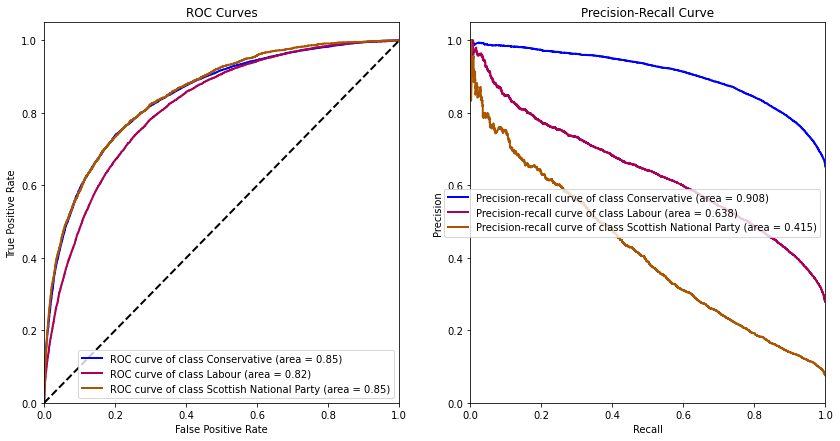

In [20]:

probas = gs.predict_proba(X_test_tf)

fig, ax = plt.subplots(ncols=2, figsize=(14,7))

skplt.metrics.plot_roc(y_test, probas, ax=ax[0], plot_micro=False, plot_macro=False, cmap='brg')
skplt.metrics.plot_precision_recall_curve(y_test, probas, ax=ax[1], cmap='brg', curves=('each_class'))

plt.show();

We have a class imbalance so we should use Precision Recall Curve as the ROC curve is too optimistic. 

The precision recall curves show that the classifier works well with predicting Conservative, less well with Labour and is pretty bad at predicting Scottish National Party.

I previously re-sampled outside of the gridsearch, which I now know is incorrect as during the cross validation stage I will be potentially testing on duplicated rows of data (falsly inflating my scores). 

I will carry out the resampling within the gridsearch pipeline to ensure that this does not happen.

In [11]:
tfidf = TfidfVectorizer(stop_words= 'english', ngram_range= (1,2), min_df = 20, max_df = 0.95)

In [12]:
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

In [22]:
over = RandomOverSampler(sampling_strategy={'Labour': 50000,
                                            'Scottish National Party' : 30000})

In [23]:
under = RandomUnderSampler(sampling_strategy = {'Conservative' : 50000})

In [15]:
X_train_os, y_train_os = (over.fit_resample(X_train_tf, y_train))

In [16]:
X_train_us, y_train_us = under.fit_resample(X_train_os, y_train_os)

In [19]:
from imblearn.pipeline import Pipeline

In [26]:
y_train.value_counts()

Conservative               61930
Labour                     26393
Scottish National Party     7103
Name: party, dtype: int64

In [27]:

model = LogisticRegression(solver='saga', penalty = 'l2', multi_class = 'ovr', max_iter = 10000)
pipe = Pipeline([('over', over), ('model', model)])

params = {'model__C': np.logspace(-4, 4, 5)}

gs = GridSearchCV(estimator = pipe,
                 param_grid = params, 
                 cv = 5, 
                verbose = 10,
                n_jobs = -1
                 )
if __name__ == '__main__':
    gs.fit(X_train_tf, y_train)


best_params = gs.best_params_
best_score = gs.best_score_
testscore =  gs.score(X_test_tf, y_test)


print('best score ', best_score)
print('test score ', testscore)
print('best params ', best_params)

predictions = gs.predict(X_test_tf)

print()
print(classification_report(y_test, predictions))

pd.DataFrame(confusion_matrix(y_test, predictions,
                              labels=y_test.unique()),
             columns=y_test.unique(),
             index=y_test.unique())

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  13 out of  25 | elapsed:  1.3min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  16 out of  25 | elapsed:  7.0min remaining:  4.0min
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  7.8min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed: 25.6min remaining:  3.5min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 30.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 30.6min finished


best score  0.776989453387918
test score  0.7861925870036782
best params  {'model__C': 1.0}

                         precision    recall  f1-score   support

           Conservative       0.87      0.85      0.86     20643
                 Labour       0.66      0.70      0.68      8798
Scottish National Party       0.53      0.53      0.53      2368

               accuracy                           0.79     31809
              macro avg       0.69      0.70      0.69     31809
           weighted avg       0.79      0.79      0.79     31809



,Labour,Conservative,Scottish National Party
Labour,6200,2102,496
Conservative,2493,17543,607
Scottish National Party,649,454,1265


/Users/alexdcruz/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


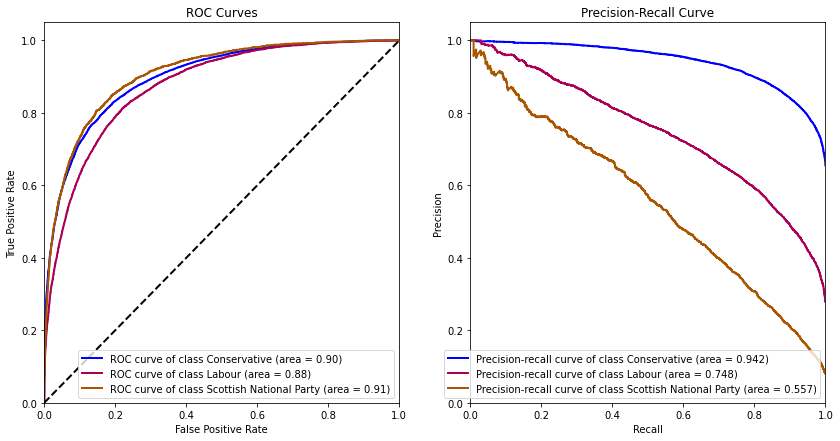

In [164]:

probas = gs.predict_proba(X_test_tf)

fig, ax = plt.subplots(ncols=2, figsize=(14,7))

skplt.metrics.plot_roc(y_test, probas, ax=ax[0], plot_micro=False, plot_macro=False, cmap='brg')
skplt.metrics.plot_precision_recall_curve(y_test, probas, ax=ax[1], cmap='brg', curves=('each_class'))

plt.show();

The ROC curve is quite sympathetic here due to the multiclass classification, the Precision - Recall Curve is a more accurate evaluation of the model. The model performs well when predicting the Conservative party, less well for Labour and only just above 50% of the SNP predictions were made correctly. We can assume that this is possibly still down to the class imbalance because Conservatives were more commonly misclassified as SNP (there are more Tory values) than Labour, while True SNP were more likely to be predicted as Labour than Tory. This follows as their political views are more aligned. 

In [30]:
new_coefs = pd.DataFrame(gs.best_estimator_[1].coef_, columns = tfidf.get_feature_names(), index = gs.best_estimator_.classes_)

I'm going to produce some visualisations of the coefficients using Wordclouds - wordclouds work by making certain words bigger depending on the frequency that they appear, so I will replicate each word by a factor of it's coefficient in order to get the sizing ordered by coefficient.

In [57]:
tory_coefs = pd.DataFrame(new_coefs.transpose().copy()['Conservative'].sort_values(ascending = False))

In [63]:
tory_coefs['words'] = tory_coefs.index

In [68]:
tory_coefs = tory_coefs[['words', 'Conservative']]

In [60]:
labour_coefs = pd.DataFrame(new_coefs.transpose().copy()['Labour'].sort_values(ascending = False))

In [72]:
labour_coefs['words'] = labour_coefs.index
labour_coefs = labour_coefs[['words', 'Labour']]

In [61]:
snp_coefs = pd.DataFrame(new_coefs.transpose().copy()['Scottish National Party'].sort_values(ascending = False))

In [74]:
snp_coefs['words'] = snp_coefs.index
snp_coefs = snp_coefs[['words', 'Scottish National Party']]

In [81]:
tory_coefs['multiplier'] = [int(100 * i) for i in tory_coefs.Conservative]

/Users/alexdcruz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
tory_coefs.words = [i + ' ' for i in tory_coefs['words']]

/Users/alexdcruz/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [111]:
tory_coefs_pos = tory_coefs[tory_coefs.multiplier >0]
tory_coefs_pos

,words,Conservative,multiplier
friend secretary,friend secretary,6.619025,661
friend minister,friend minister,6.109106,610
friend,friend,5.716544,571
hon friend,hon friend,5.485678,548
course,course,5.485675,548
...,...,...,...
lucy powell,lucy powell,0.010078,1
businesspeople,businesspeople,0.010070,1
equity,equity,0.010055,1
campaigned issue,campaigned issue,0.010023,1


In [109]:
[tory_coefs_pos.words * tory_coefs_pos.multiplier]

[friend secretary    friend secretary friend secretary friend secre...
 friend minister     friend minister friend minister friend ministe...
 friend              friend friend friend friend friend friend frie...
 hon friend          hon friend hon friend hon friend hon friend ho...
 course              course course course course course course cour...
                                           ...                        
 lucy powell                                              lucy powell 
 businesspeople                                        businesspeople 
 equity                                                        equity 
 campaigned issue                                    campaigned issue 
 benefit cuts                                            benefit cuts 
 Length: 21314, dtype: object]

In [113]:
tory_coefs_pos['strings'] = tory_coefs_pos.words * tory_coefs_pos.multiplier

/Users/alexdcruz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [167]:
labour_coefs['multiplier'] = [int(100 * i) for i in labour_coefs.Labour]
labour_coefs.words = [i + ' ' for i in labour_coefs['words']]
labour_coefs_pos = labour_coefs[labour_coefs.multiplier >0]
labour_coefs_pos['strings'] = labour_coefs_pos.words * labour_coefs_pos.multiplier


/Users/alexdcruz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [168]:
snp_coefs['multiplier'] = [int(100 * i) for i in snp_coefs['Scottish National Party']]
snp_coefs.words = [i + ' ' for i in snp_coefs['words']]
snp_coefs_pos = snp_coefs[snp_coefs.multiplier >0]
snp_coefs_pos['strings'] = snp_coefs_pos.words * snp_coefs_pos.multiplier


/Users/alexdcruz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [123]:
import PIL as pillow
import wordcloud

In [121]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

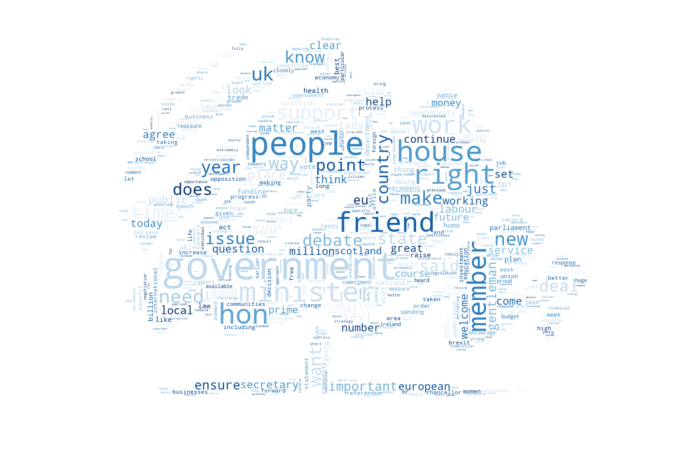

In [127]:
tory_string = []
for t in tory_coefs_pos.strings:
    tory_string.append(t)
tory_string = pd.Series(tory_string).str.cat(sep=' ')


mask = np.array(pillow.Image.open('tory-logo.png'))
wc = WordCloud(colormap = 'Blues', stopwords = 'english', collocations=False,
               mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(tory_string)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()


#wordcloud = WordCloud(width=1600, height=800,max_font_size=200, collocations=False).generate(tory_string)
#plt.figure(figsize=(12,10))
#plt.imshow(wordcloud, interpolation="bilinear")
#plt.axis("off")
#plt.show()

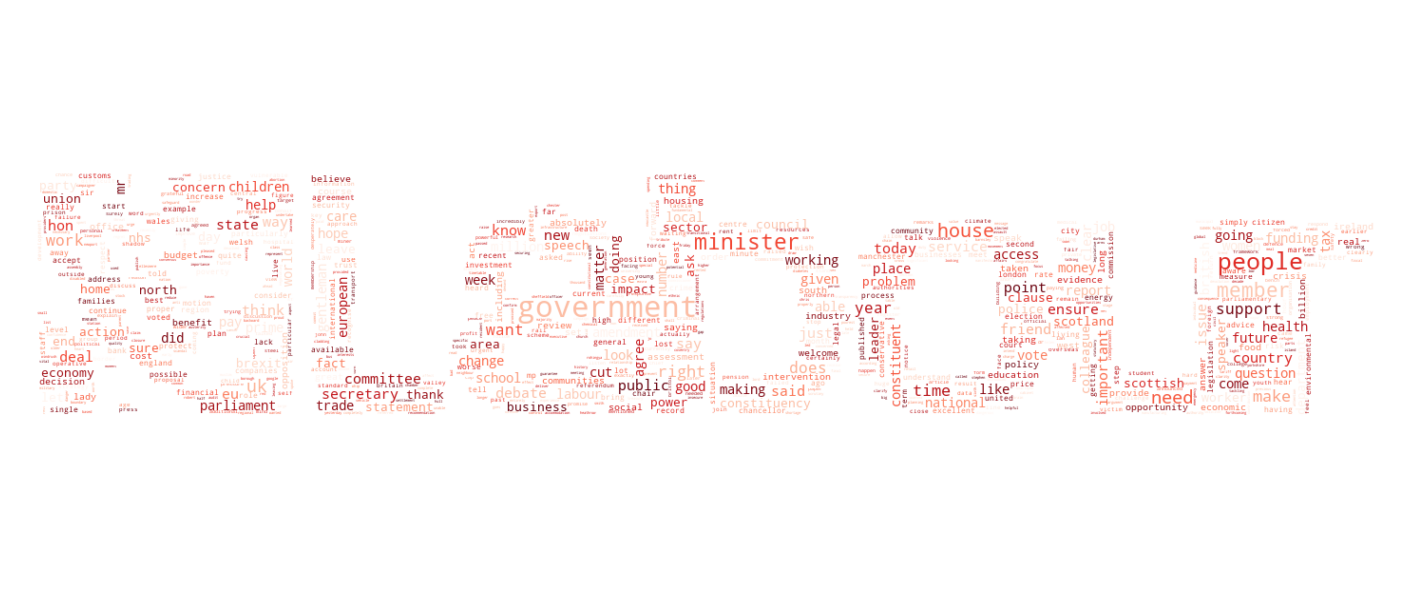

In [137]:
labour_string = []
for t in labour_coefs_pos.strings:
    labour_string.append(t)
labour_string = pd.Series(labour_string).str.cat(sep=' ')


mask = np.array(pillow.Image.open('Labour-Logo.jpg'))
wc = WordCloud(colormap = 'Reds', stopwords = 'english', collocations=False,
               mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(labour_string)
plt.figure(figsize=(25,20))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()


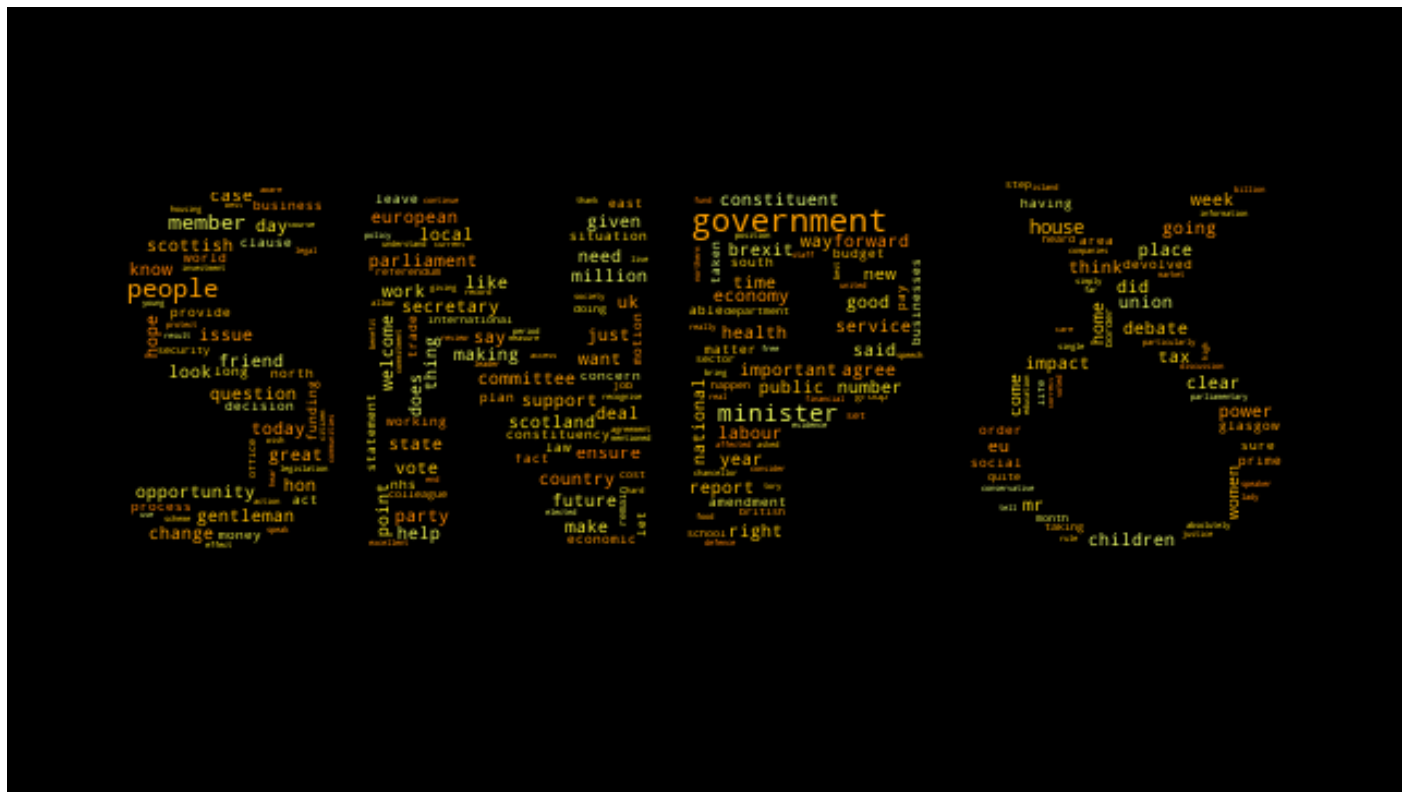

In [149]:
snp_string = []
for t in snp_coefs_pos.strings:
    snp_string.append(t)
snp_string = pd.Series(snp_string).str.cat(sep=' ')


mask = np.array(pillow.Image.open('snp.jpeg'))
wc = WordCloud(colormap = 'Wistia', stopwords = 'english', collocations=False,
               mask=mask, background_color="black",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(snp_string)
plt.figure(figsize=(25,20))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()


Parliamentary language is appearing despite TFIDF limiting common words due to ngrams = 2, some strings of two words include terms such as 'hon', 'minister' or 'member', and these are appearing in the Wordclouds. I will try to remove these by adding these terms to the stopwords for the wordcloud. Really these should be added to stopwords for the TFIDF stage. 

In [158]:
stop = stopwords.words('english')
stop = stop + ['conservative','conservatives',
               'tory','tories','labour','corbyn', 
               'hon', 'friend', 'johnson', 'member', 
               'honerable', 'right', 'minister', 'government']
parlilanguage = ['conservative','conservatives',
               'tory','tories','labour','corbyn', 
               'hon', 'friend', 'johnson', 'member', 
               'honerable', 'right', 'minister', 'government']

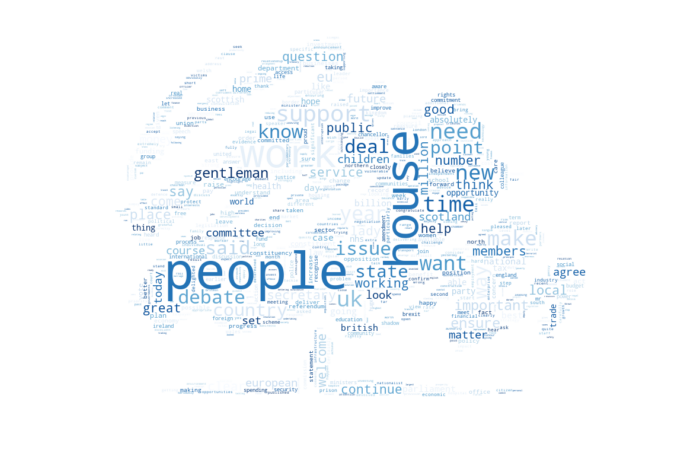

In [155]:
tory_string = []
for t in tory_coefs_pos.strings:
    tory_string.append(t)
tory_string = pd.Series(tory_string).str.cat(sep=' ')


mask = np.array(pillow.Image.open('tory-logo.png'))
wc = WordCloud(colormap = 'Blues', stopwords = stop, collocations=False,
               mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(tory_string)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

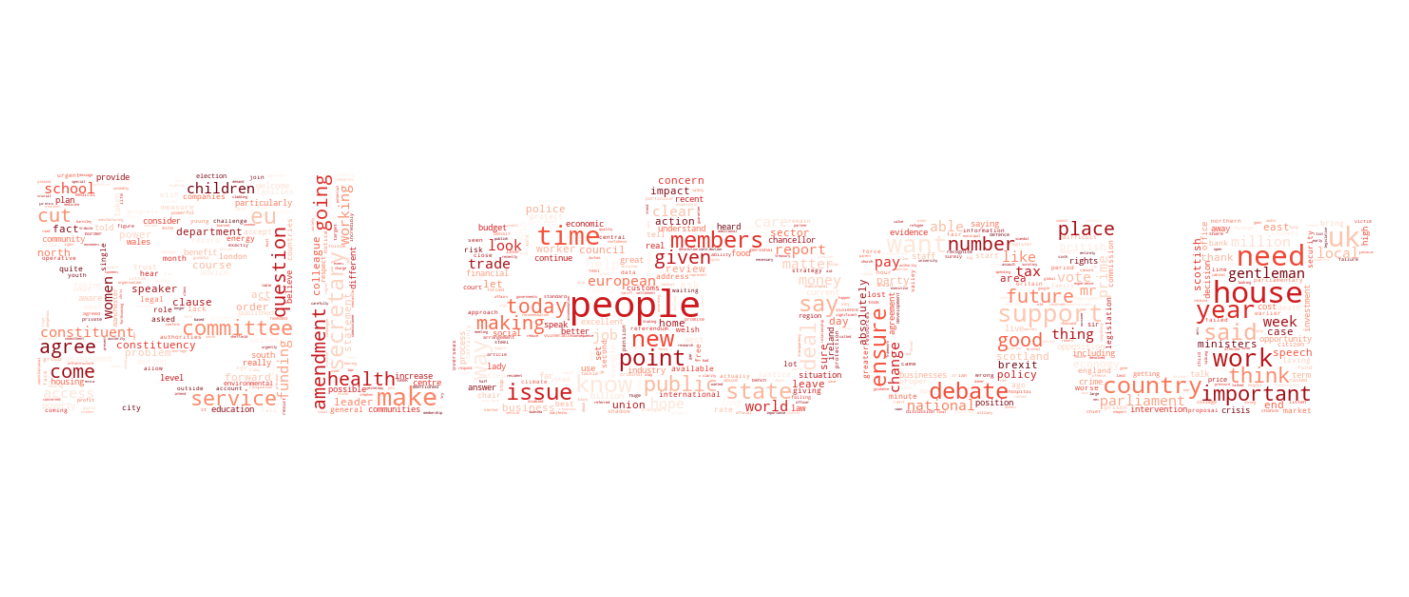

In [156]:
labour_string = []
for t in labour_coefs_pos.strings:
    labour_string.append(t)
labour_string = pd.Series(labour_string).str.cat(sep=' ')


mask = np.array(pillow.Image.open('Labour-Logo.jpg'))
wc = WordCloud(colormap = 'Reds', stopwords = stop, collocations=False,
               mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(labour_string)
plt.figure(figsize=(25,20))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()


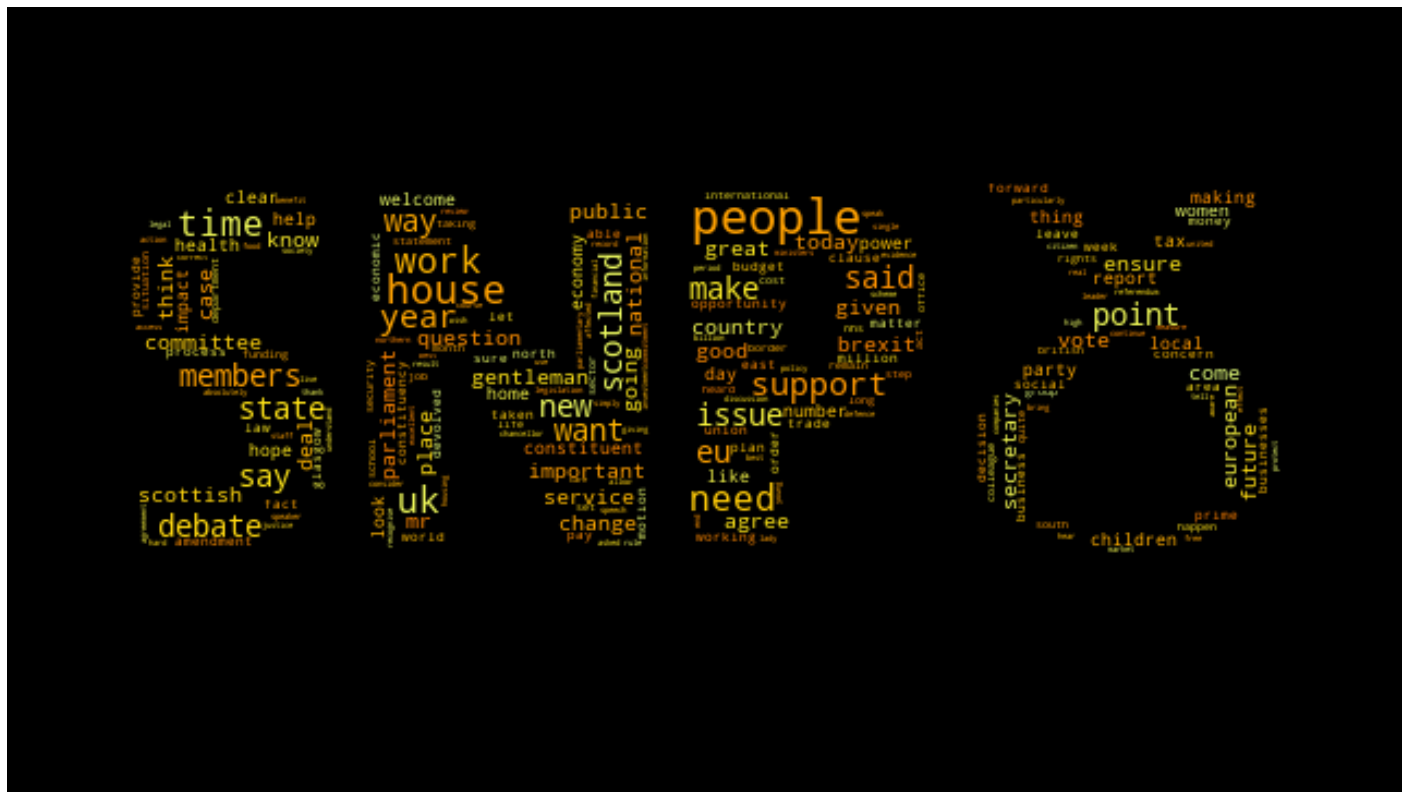

In [163]:
snp_string = []
for t in snp_coefs_pos.strings:
    snp_string.append(t)
snp_string = pd.Series(snp_string).str.cat(sep=' ')


mask = np.array(pillow.Image.open('snp.jpeg'))
wc = WordCloud(colormap = 'Wistia', stopwords = stop, collocations=False,
               mask=mask, background_color="black",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(snp_string)
plt.figure(figsize=(25,20))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()
